Máquina de Vetor de Suporte (SVM): classificação, regressão, supervisionado
Classes linearmente separáveis. O SVM usa a métrica de margem, como que a melhor distância de uma reta (maximiza a distância para os pontos mais próximos à reta (vetores de suporte), para as classes envolvidas)


In [2]:
from sklearn import datasets
import pandas as pd
import seaborn as sb

In [3]:
#!pip install jupyterthemes

In [3]:
iris = datasets.load_iris()
# apresenta toda a descricao do dataset
#iris

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Criando uma coluna de 'target' com a classificação numérica em 03 classes (0,1,2) já existente no dataset, e transformando a coluna 'species' em categórica

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']=iris.target #acrescenta coluna target
df['species']=pd.Categorical.from_codes(iris.target, iris.target_names) # de códigos para nomes

In [13]:
# Checando que species mudou de object para category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int32   
 5   species            150 non-null    category
dtypes: category(1), float64(4), int32(1)
memory usage: 5.7 KB


In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


C:\Users\josen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\josen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


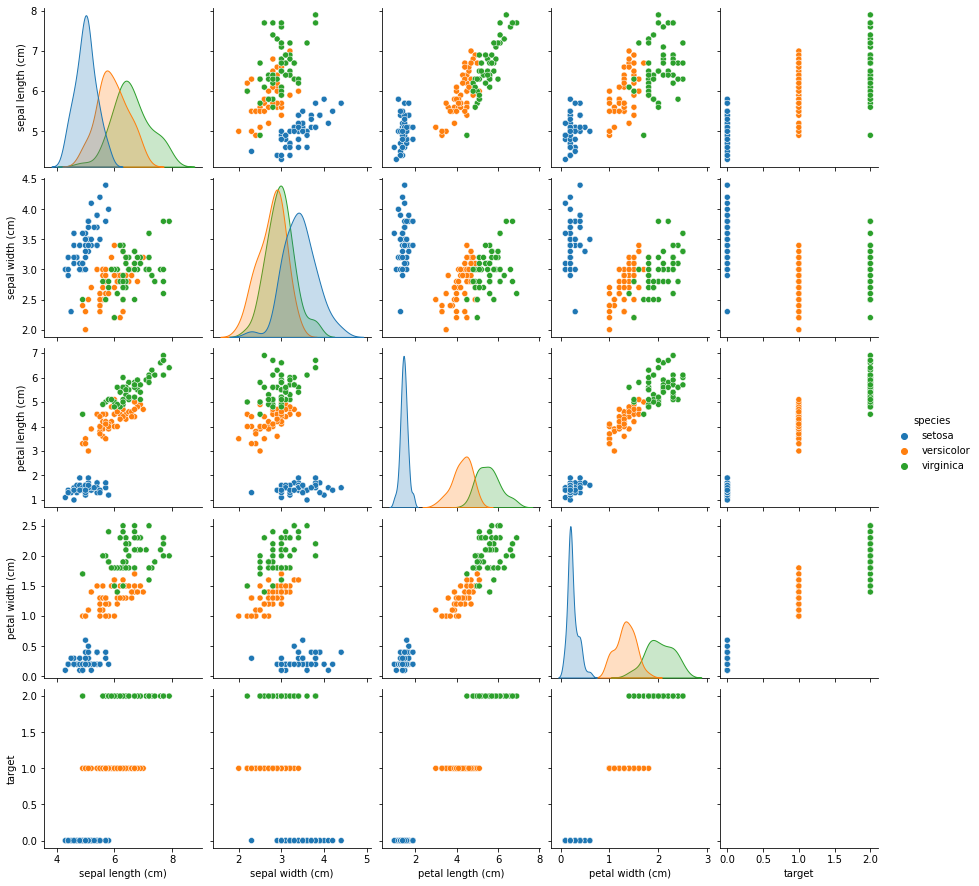

In [7]:
sb.pairplot(df, hue='species') #aqui species está categórico. Se não mudar para categórico, usar hue='target'

Uma breve análise nas dispersões permitem inferir que a virginica e a versicolor são mais parecidas (estão mais próximas) do que a setosa, que sempre aparece separada. Pode-se perceber uma 'fronteira' entre os grupos. O SVM permite estender para dados não linearmente separáveis, mudando o KERNEL, ou função de separação (polinomial, RBF etc.)

In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split

Como iris.data já é um array numpy e iris.target também, podemos associar a X (features) e y diretamente

In [11]:
X = iris.data
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

Instanciar um classificador SVM:

In [14]:
clf = svm.SVC(C=1.0) # C define margem suave ou rígida

In [15]:
clf.fit(X_train, y_train)

SVC()

Vamos agora fazer a predição, no sentido de classificar os dados de teste

In [21]:
y_svm=clf.predict(X_test)
y_svm

array([0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2])

Uma inspeção visual comparando a predição com y_test:

In [17]:
y_test

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2])

Medindo a acurácia média, temos:

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_svm))
print(clf.score(X_test, y_test))

0.9555555555555556
0.9555555555555556
